In [1]:
import numpy as np
from os.path import join as pjoin
from matplotlib import pyplot as plt
from magicbox.algorithm.plot import show_bar_value
from nibrain.util.plotfig import auto_bar_width

proj_dir = '/nfs/t3/workingshop/chenxiayu/study/FFA_pattern'
anal_dir = pjoin(proj_dir, 'analysis/s2/1080_fROI/refined_with_Kevin')
work_dir = pjoin(anal_dir, 'paper_fig')

# 画出各分组人数百分比

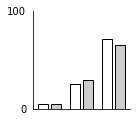

In [21]:
figsize = (2, 1.8)
n_subj = 1080
gids = (0, 1, 2)
gnames = ('single', 'two-C', 'two-S')
n_gid = len(gids)
hemis = ('lh', 'rh')
n_hemi = len(hemis)
hemi2color = {'lh': 'w', 'rh': (0.8, 0.8, 0.8, 1)}
gid_file = pjoin(anal_dir, 'grouping/group_id_{hemi}.npy')
out_file = None
# out_file = pjoin(work_dir, 'grouping_incidence_rate.jpg')

x = np.arange(n_gid)
width = auto_bar_width(x, n_hemi)
offset = -(n_hemi - 1) / 2
_, ax = plt.subplots(figsize=figsize)
for hemi in hemis:
    gid_vec = np.load(gid_file.format(hemi=hemi))
    assert len(gid_vec) == n_subj
    y = np.zeros(n_gid, np.float64)
    for gid_idx, gid in enumerate(gids):
        y[gid_idx] = np.mean(gid_vec == gid) * 100
    rects = ax.bar(x+1.2*width*offset, y, width, label=hemi,
                   fc=hemi2color[hemi], ec='k')
    # show_bar_value(rects, '.1f')
    offset += 1
# ax.set_xlabel('FFA configuration')
# ax.set_xticks(x)
# ax.set_xticklabels(gnames)
# ax.set_ylabel('Percentage of population')
ax.set_yticks([0, 100])
ax.set_yticklabels([0, 100])
ax.tick_params(bottom=False, labelbottom=False, left=False)
# ax.set_title('incidence rates')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)